<a href="https://colab.research.google.com/github/noelivander/AVD-2/blob/main/KNN_with_Drug.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Install scikit-learn** bagi yang belum instalasi

In [ ]:
!pip install scikit-learn==0.23.1

#MENGINSTAL KIT YANG DIBUTUHKAN

Memanggil semua package yang akan digunakan

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
%matplotlib inline

#MENGIMPORT PACKAGE YANG DIBUTUHKAN

Load data set, dengan cara upload terlebih dahulu ke drive google collab

In [ ]:
df = pd.read_csv('drug200.csv')
df.head()

#MENGIMPORT DAN MENAMPILKAN DATASET YANG AKAN DIOLAH/DIGUNAKAN

,umur,jk,imt,kolestrol,kandungan,minuman
0,23,F,HIGH,HIGH,25.355,5
1,47,M,LOW,HIGH,13.093,3
2,47,M,LOW,HIGH,10.114,3
3,28,F,NORMAL,HIGH,7.798,4
4,61,F,LOW,HIGH,18.043,5


**Lakukan visualisasi data terlebih dahulu untuk mengeksplorasi data**

In [ ]:
df['minuman'].value_counts()

#UNTUK MENAMPILKAN VALUE TIAP KATEGORI MINUMAN (1-5)

,count
minuman,
5,91
4,54
1,23
3,16
2,16


Membuat histogram beberapa variabel bebas

In [ ]:
df.info()

#MENAMPILKAN STRUKTUR DARI TABEL DATASET YANG DIGUNAKAN

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   umur       200 non-null    int64  
 1   jk         200 non-null    object 
 2   imt        200 non-null    object 
 3   kolestrol  200 non-null    object 
 4   kandungan  200 non-null    float64
 5   minuman    200 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 9.5+ KB


  Kategori  Jumlah
0        M     104
1        F      96


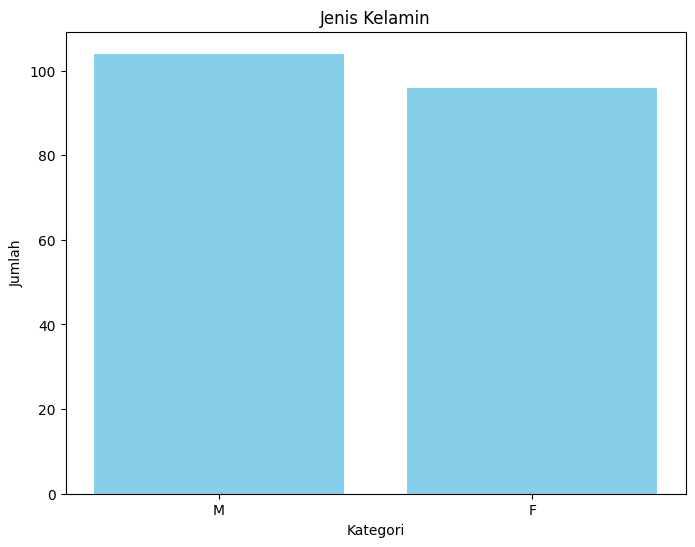

In [ ]:
# Tabulasi data
tabulasi_jk = df['jk'].value_counts().reset_index()
tabulasi_jk.columns = ['Kategori', 'Jumlah']  # Menamai kolom
print(tabulasi_jk)

# Membuat bar chart
plt.figure(figsize=(8, 6))  # Mengatur ukuran gambar
plt.bar(tabulasi_jk['Kategori'], tabulasi_jk['Jumlah'], color='skyblue')  # Membuat bar chart
plt.xlabel('Kategori')  # Label sumbu X
plt.ylabel('Jumlah')  # Label sumbu Y
plt.title('Jenis Kelamin')  # Judul
plt.show()  # Menampilkan grafik

#MENYAJIKAN DATA JENIS KELAMIN DALAM BENTUK TABEL
#KEMUDIAN DI KONVERSI MENJADI SEBUAH BARCHART JENIS KELAMIN

   Kategori  Jumlah
0         5      91
1         4      54
2         1      23
3         3      16
4         2      16


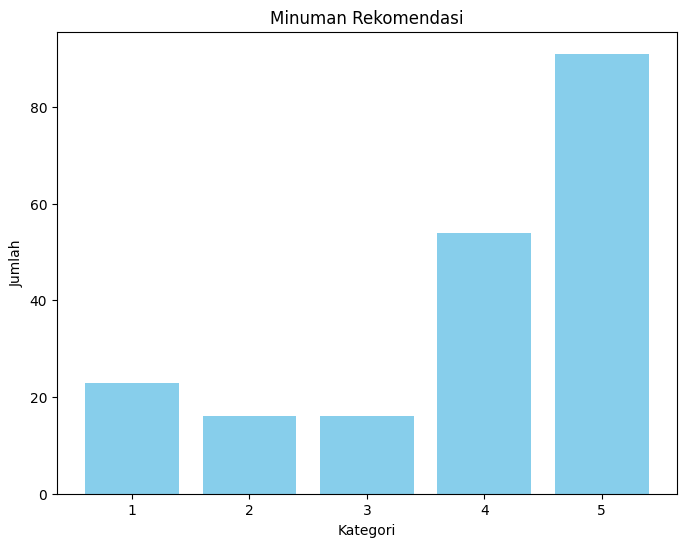

In [ ]:
# Tabulasi data
tabulasi_minuman = df['minuman'].value_counts().reset_index()
tabulasi_minuman.columns = ['Kategori', 'Jumlah']  # Menamai kolom
print(tabulasi_minuman)

# Membuat bar chart
plt.figure(figsize=(8, 6))  # Mengatur ukuran gambar
plt.bar(tabulasi_minuman['Kategori'], tabulasi_minuman['Jumlah'], color='skyblue')  # Membuat bar chart
plt.xlabel('Kategori')  # Label sumbu X
plt.ylabel('Jumlah')  # Label sumbu Y
plt.title('Minuman Rekomendasi')  # Judul
plt.show()  # Menampilkan grafik

#MENYAJIKAN DATA MINUMAN DALAM BENTUK TABEL
#KEMUDIAN DI KONVERSI MENJADI SEBUAH BARCHART MINUMAN REKOMENDASI

**Persiapan Data**

*   Membuat kelompok Feature atau variabel bebas tersendiri
*   Membuat kelompok labels atau variabel terikat tersendiri



In [ ]:
df.columns

#MENAMPILKAN TIAP KOLOM DALAM DATA YANG DIGUNAKAN

Index(['umur', 'jk', 'imt', 'kolestrol', 'kandungan', 'minuman'], dtype='object')

In [ ]:
X = df[['umur', 'jk', 'imt', 'kolestrol', 'kandungan']] .values  #.astype(float)
X[0:5]

#MEMBUAT VARIABLE X YANG BERISI DATA INDEPENDEN
#MENAMPILKAN 5 ISI/ARRAY DALAM KOLOM DATASET YANG DIGUNAKAN

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.114],
       [28, 'F', 'NORMAL', 'HIGH', 7.798],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

In [ ]:
y = df['minuman'].values
y[0:5]

#MEMBUAT VARIABLE Y YANG BERISI DATA DEPENDEN
#MENAMPILKAN ISI/ARRAY DALAM KOLOM MINUMAN

array([5, 3, 3, 4, 5])

Data berbentuk huruf tidak dapat di proses sehingga perlu di transformasi berbentuk numerik

In [ ]:
from sklearn import preprocessing
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
X[:,1] = le_sex.transform(X[:,1])


le_BP = preprocessing.LabelEncoder()
le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
X[:,2] = le_BP.transform(X[:,2])


le_Chol = preprocessing.LabelEncoder()
le_Chol.fit([ 'NORMAL', 'HIGH'])
X[:,3] = le_Chol.transform(X[:,3])

X[0:5]

#MENGKONVERSI DATA KATEGORIKAL MENJADI NUMERIK AGAR DAPAT DIPROSES

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043]], dtype=object)

**Lakukan Normalisasi Data**

In [ ]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

#PROSES NORMALISASI DATA MENGGUNAKAN STANDARDSCALER
#SEHINGGA SETIAP FITUR MEMILIKI RATA-RATA 0 DAN STANDAR DEVIASI 1

array([[-1.29159102, -1.040833  , -1.11016894, -0.97043679,  1.28652212],
       [ 0.16269866,  0.96076892,  0.10979693, -0.97043679, -0.4151454 ],
       [ 0.16269866,  0.96076892,  0.10979693, -0.97043679, -0.82855818],
       [-0.988614  , -1.040833  ,  1.32976279, -0.97043679, -1.14996267],
       [ 1.0110343 , -1.040833  ,  0.10979693, -0.97043679,  0.27179427]])

**Membagi data menjadi data training dan testing**

proporsi sebesar 20% data testing, dan 80% data training

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

#MEMBAGI PROPORSI DATA
#TRAIN SET 160 SAMPEL, TEST SET 40 SAMPEL

Train set: (160, 5) (160,)
Test set: (40, 5) (40,)


**Klasifikasi KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

#MENGIMPORT SKLEARN.NEIGHBORS

**1. Training atau melatih model**

Kita memulai dengan menentukan k=4

In [ ]:
k = 4
#Train Model and Predict
model_knn = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
model_knn

#MENENTUKAN NILAI K
#K=4 BERARTI 4 TETANGGA TERDEKAT UNTUK MELAKUKAN KLASIFIKASI

KNeighborsClassifier(n_neighbors=4)

**2. Prediksi data testing**

In [ ]:
yhat = model_knn.predict(X_test)
yhat[0:5]

#SEBAGAI HASIL PREDIKSI

array([5, 5, 5, 5, 3])

In [ ]:
y_test[0:5]

#SEBAGAI LABEL ASLI
#TUJUANNYA MEMBANDINGKAN KEAKURATAN MODEL KNN

array([5, 5, 5, 5, 3])

**3. Evaluasi Akurasi Model**

In multilabel classification, accuracy classification score is a function that computes subset accuracy. This function is equal to the jaccard_score function. Essentially, it calculates how closely the actual labels and predicted labels are matched in the test set.

In [ ]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, model_knn.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

#AKURASI TRAIN SET 90% MENUNJUKKAN BAHWA MODEL BELAJAR DENGAN BAIK
#AKURASI TEST SET 75% MENUNJUKKAN PERFORMA MODEL PADA DATA BARU

Train set Accuracy:  0.9
Test set Accuracy:  0.75


KESIMPULAN

Model Decision Tree (98.3%) memiliki akurasi lebih tinggi dibandingkan KNN (75%), tetapi kemungkinan besar mengalami overfitting karena terlalu menyesuaikan diri dengan data training. Sementara itu, KNN memiliki akurasi lebih rendah, tetapi cenderung lebih baik dalam generalisasi. Jika tujuan utama adalah akurasi tinggi, Decision Tree bisa menjadi pilihan, namun jika ingin model yang lebih general, KNN bisa lebih stabil.